## Step 1: The preliminaries
### 1(a) Import the libraries 

In [2]:
import os
import numpy as np
import scipy
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
import statsmodels.formula.api as smf
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir('/Users/Andy/Jupyter/Workshop_2023')

### 1(b) Load all the data - this time we remove those non-beating cells

In [4]:
%run 'load_data_common.py'

df_features = df_features.dropna(subset=['voltage_beating_frequencies'])
Verapamil = df_features.loc[(df_features['drug'] == 'Verapamil') & (df_features['dose'] != '10uM') & (df_features['dose'] != '100uM')  ]

Control = df_features.loc[(df_features['drug'] == 'Control')]
BayK = df_features.loc[(df_features['drug'] == 'Bay_K')]
Dofetilide = df_features.loc[(df_features['drug'] == 'Dofetilide')]
df_reduced = pd.concat([Control,BayK,Verapamil,Dofetilide])

data_curated/traces_full.csv
data_curated/traces_avg.csv
data_curated/features.csv


## Now we are going to make some comparisons (inferences) "among" those 4 groups:  
### (A) Control,  (B) Bay K8644,  (C) Verapamil, (D) Dofetilide

## $APD_{80}$

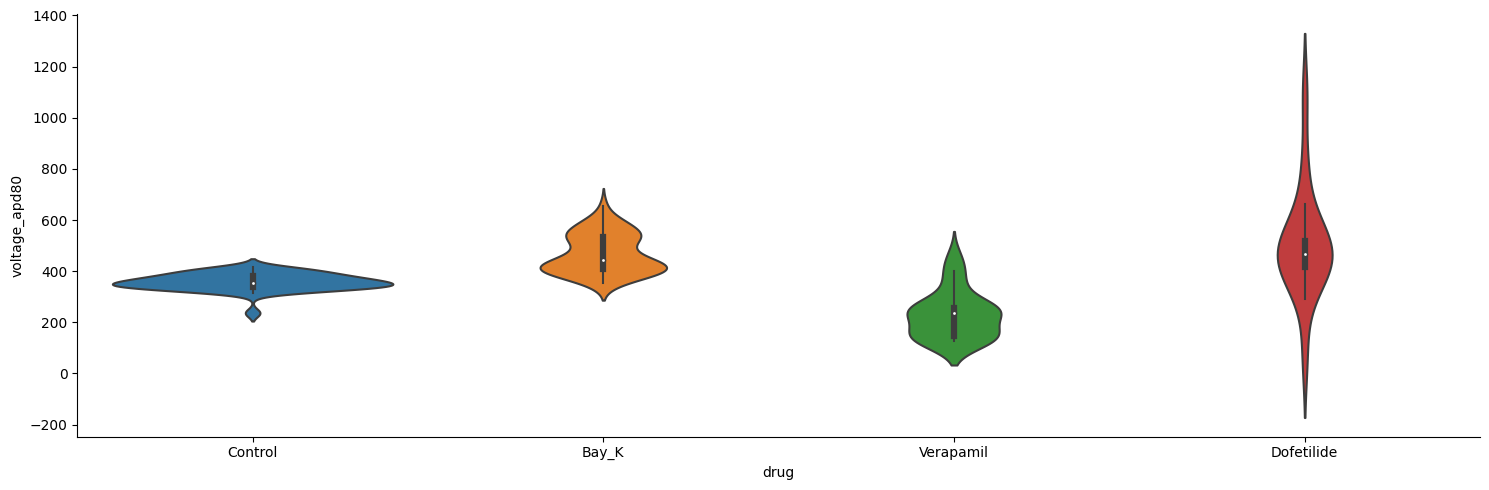

In [5]:
sns.catplot(x='drug', y='voltage_apd80', data=df_reduced[['drug','voltage_apd80']], dodge=True, kind='violin', aspect=3)

<Axes: xlabel='drug', ylabel='voltage_apd80'>

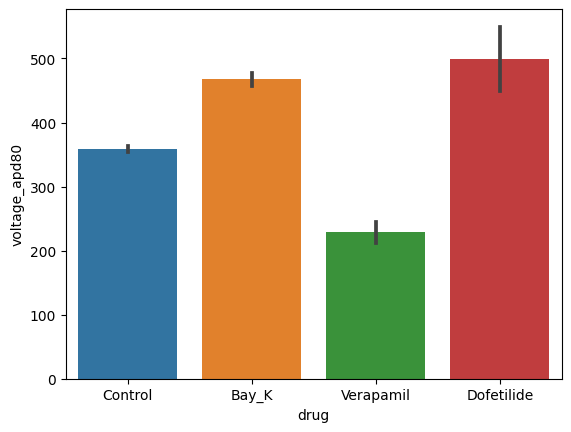

In [6]:
sns.barplot(x = "drug", y = "voltage_apd80", data = df_reduced[['drug',"voltage_apd80"]], estimator = "mean", errorbar = 'se')

# Starting with the simplest question: is there a difference in mean $APD_{90}$ across drugs?

## (1) One-way (single factor) ANOVA

In [7]:
Control = df_features.loc[(df_features["drug"]=="Control"),["drug","dose","voltage_apd80","tissue","well"]]
Bay_K = df_features.loc[(df_features["drug"]=="Bay_K"),["drug","dose","voltage_apd80","tissue","well"]]
Verapamil = df_features.loc[(df_features["drug"]=="Verapamil"),["drug","dose","voltage_apd80","tissue","well"]]
Dofetilide = df_features.loc[(df_features["drug"]=="Dofetilide"),["drug","dose","voltage_apd80","tissue","well"]]

Control

,drug,dose,voltage_apd80,tissue,well
540,Control,0.0006%,375.012408,tissue3,D8
541,Control,0.06%,403.813282,tissue3,D8
542,Control,baseline,375.643170,tissue3,D8
543,Control,0.6%,409.440912,tissue3,D8
544,Control,0.006%,386.386963,tissue3,D8
545,Control,0.0006%,395.557567,tissue4,D8
546,Control,0.06%,416.939035,tissue4,D8
547,Control,baseline,371.300277,tissue4,D8
548,Control,0.6%,236.665577,tissue4,D8
549,Control,0.006%,355.858197,tissue4,D8


In [8]:
F,p = stats.f_oneway(Control["voltage_apd80"],Bay_K["voltage_apd80"],Verapamil["voltage_apd80"],Dofetilide["voltage_apd80"])

print('F statistic value:',F)
print('p-value:',p)

F statistic value: 52.801776007905836
p-value: 3.572073119489066e-23


## (2) Equivalent General Linear Model formulation

## Our simple one factor linear model:   

$$\Large
APD_{80_{ij}}=\beta_{0} + \beta_{1}drug_{i} + \epsilon_{ij}
$$

### Need to rearrange the data a little first

In [9]:
df_1way = pd.concat([Control,Bay_K,Verapamil,Dofetilide])

df_1way

,drug,dose,voltage_apd80,tissue,well
540,Control,0.0006%,375.012408,tissue3,D8
541,Control,0.06%,403.813282,tissue3,D8
542,Control,baseline,375.643170,tissue3,D8
543,Control,0.6%,409.440912,tissue3,D8
544,Control,0.006%,386.386963,tissue3,D8
...,...,...,...,...,...
236,Dofetilide,0.1nM,431.329620,tissue1,D5
237,Dofetilide,100nM,513.288103,tissue1,D5
238,Dofetilide,baseline,412.572763,tissue1,D5
239,Dofetilide,1nM,499.637639,tissue1,D5


In [10]:
one_way_glm_model = smf.ols(formula="voltage_apd80 ~ drug", data=df_1way)
one_way_glm_fit = one_way_glm_model.fit()
print(one_way_glm_fit.summary())
anova_table = sm.stats.anova_lm(one_way_glm_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:          voltage_apd80   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     52.80
Date:                Tue, 23 May 2023   Prob (F-statistic):           3.57e-23
Time:                        22:25:24   Log-Likelihood:                -898.76
No. Observations:                 150   AIC:                             1806.
Df Residuals:                     146   BIC:                             1818.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            467.6578     12

# What about the effect dose for a drug?

## Control ("dose" refers to [DMSO]): Let's first look at the distributions again

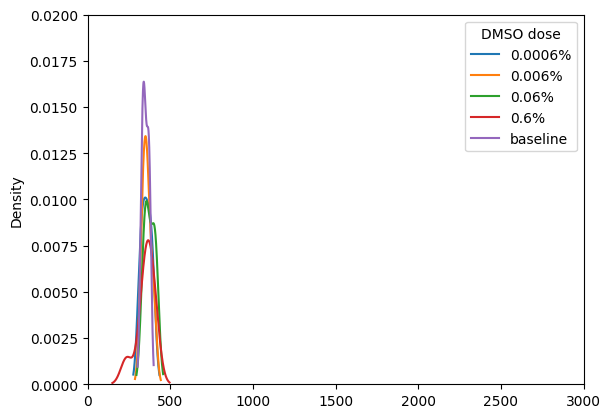

In [11]:
Control.groupby('dose')['voltage_apd80'].plot(kind='kde', xlim=[0,3000], ylim=[0,0.02])
dose = ['0.0006%','0.006%','0.06%','0.6%','baseline']
plt.legend(dose, title='DMSO dose')

In [12]:
Control_RM = Control.copy()
Control_RM["tissue_RM"] = Control_RM.apply(lambda _: ' ', axis=1)
Control_RM["dose_RM"] = Control_RM.apply(lambda _: ' ', axis=1)
wells_unique = Control_RM["well"].unique()
tissue_num = 1
for well in wells_unique:
    well_rows = Control_RM.loc[(Control_RM["well"] == well)]
    tissue_unique = well_rows["tissue"].unique()
    for tissue in tissue_unique:
        Control_RM.loc[(Control_RM["well"] == well) & (Control_RM["tissue"]==tissue),"tissue_RM"]=tissue_num
        tissue_num = tissue_num+1
Control_RM

,drug,dose,voltage_apd80,tissue,well,tissue_RM,dose_RM
540,Control,0.0006%,375.012408,tissue3,D8,1,
541,Control,0.06%,403.813282,tissue3,D8,1,
542,Control,baseline,375.643170,tissue3,D8,1,
543,Control,0.6%,409.440912,tissue3,D8,1,
544,Control,0.006%,386.386963,tissue3,D8,1,
545,Control,0.0006%,395.557567,tissue4,D8,2,
546,Control,0.06%,416.939035,tissue4,D8,2,
547,Control,baseline,371.300277,tissue4,D8,2,
548,Control,0.6%,236.665577,tissue4,D8,2,
549,Control,0.006%,355.858197,tissue4,D8,2,


## Running the Repeated Measures design using conventional ANOVA  

In [13]:
Control_RM_anova_table = AnovaRM(data=Control_RM, depvar='voltage_apd80', subject='tissue_RM', within=['dose']).fit()
print(Control_RM_anova_table)

              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
dose  1.1347 4.0000 28.0000 0.3605



## Now let's try Bay K8644 

### Those distributions again:

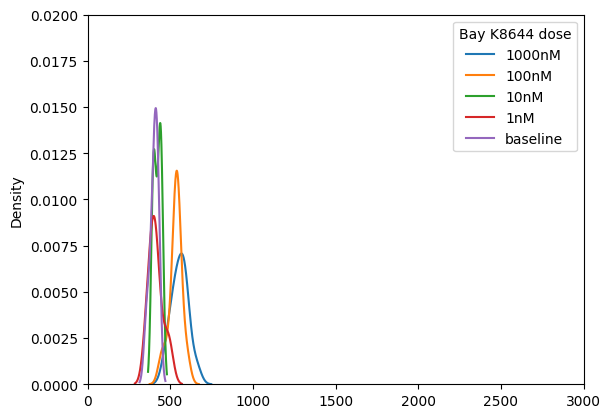

In [14]:
BayK.groupby('dose')['voltage_apd80'].plot(kind='kde', xlim=[0,3000], ylim=[0,0.02])
dose = ['1000nM','100nM','10nM','1nM','baseline']
plt.legend(dose, title='Bay K8644 dose')

### Mmm, mmm. Looking pretty good. There must be a drug effect here.

### Reconfiguring the Bay K data for a "within subjects" tissue design for RMANOVA

In [15]:
Bay_K_RM = Bay_K.copy()
Bay_K_RM["tissue_RM"] = Bay_K_RM.apply(lambda _: ' ', axis=1)
wells_unique = Bay_K["well"].unique()
tissue_num = 1
for well in wells_unique:
    well_rows = Bay_K.loc[(Bay_K["well"] == well)]
    tissue_unique = well_rows["tissue"].unique()
    for tissue in tissue_unique:
        Bay_K_RM.loc[(Bay_K["well"] == well) & (Bay_K["tissue"]==tissue),"tissue_RM"]=tissue_num
        tissue_num = tissue_num+1

In [16]:
AnovaRM(data=Bay_K_RM, depvar='voltage_apd80', subject='tissue_RM', within=['dose']).fit()

ValueError: Data is unbalanced.

# What? Does this mean I can't use a "within subjects" design?

## Linear mixed models offer robustness to unbalanced datasets and non-normal underlying distributions

In [17]:
model = smf.mixedlm("voltage_apd80 ~ dose", Bay_K_RM, groups=Bay_K_RM["tissue_RM"])

mdf = model.fit()

print(mdf.summary())

              Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   voltage_apd80
No. Observations:    59        Method:               REML         
No. Groups:          13        Scale:                895.1982     
Min. group size:     3         Log-Likelihood:       -274.3363    
Max. group size:     5         Converged:            Yes          
Mean group size:     4.5                                          
------------------------------------------------------------------
                  Coef.   Std.Err.    z    P>|z|  [0.025   0.975] 
------------------------------------------------------------------
Intercept         558.260   10.598  52.674 0.000  537.488  579.033
dose[T.100nM]     -29.013   12.387  -2.342 0.019  -53.292   -4.735
dose[T.10nM]     -139.459   12.042 -11.581 0.000 -163.061 -115.857
dose[T.1nM]      -145.065   11.736 -12.361 0.000 -168.066 -122.063
dose[T.baseline] -159.539   12.760 -12.503 0.000 -184.548 -134.530
Group Var 

In [18]:
model_Control = smf.mixedlm("voltage_apd80 ~ dose", Control_RM, groups=Control_RM["tissue_RM"])

mdf_Control = model_Control.fit()

print(mdf_Control.summary())

            Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  voltage_apd80
No. Observations:  40       Method:              REML         
No. Groups:        8        Scale:               730.6075     
Min. group size:   5        Log-Likelihood:      -174.9055    
Max. group size:   5        Converged:           Yes          
Mean group size:   5.0                                        
--------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept        355.421   11.918 29.821 0.000 332.061 378.780
dose[T.0.006%]     3.666   13.515  0.271 0.786 -22.823  30.155
dose[T.0.06%]     20.641   13.515  1.527 0.127  -5.848  47.129
dose[T.0.6%]      -3.296   13.515 -0.244 0.807 -29.785  23.193
dose[T.baseline]  -4.398   13.515 -0.325 0.745 -30.887  22.090
Group Var        405.773   12.202                             

